In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
path_citrus = 'dataset/citrus.csv'
citrus = pd.read_csv(path_citrus)
citrus.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [3]:
path_iris = 'dataset\Iris.csv'
iris = pd.read_csv(path_iris)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
scaler = MinMaxScaler()
le = LabelEncoder()

citrus_processed = citrus.copy()

colors = ['red', 'green', 'blue']
numerical = ['diameter', 'weight']
target_citrus = 'name'

names = pd.unique(citrus[target_citrus])

citrus_processed[colors] /= 255
citrus_processed[numerical] = scaler.fit_transform(citrus[numerical])
citrus_processed[target_citrus] = le.fit_transform(citrus[target_citrus])

print(names)
citrus_processed.head()

['orange' 'grapefruit']


,name,diameter,weight,red,green,blue
0,1,0.000000,0.000000,0.674510,0.333333,0.007843
1,1,0.070423,0.007382,0.650980,0.305882,0.011765
2,1,0.108228,0.048126,0.611765,0.317647,0.007843
3,1,0.111935,0.050587,0.639216,0.317647,0.015686
4,1,0.112676,0.051502,0.631373,0.282353,0.035294


In [5]:
iris_processed = iris.copy()
categorical = ['Species']
numerical = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
target_iris = 'Species'
for feature in categorical:
    iris_processed[feature] = le.fit_transform(iris_processed[feature])

iris_processed[numerical] = scaler.fit_transform(iris_processed[numerical])
iris_processed.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,0.222222,0.625000,0.067797,0.041667,0
1,2,0.166667,0.416667,0.067797,0.041667,0
2,3,0.111111,0.500000,0.050847,0.041667,0
3,4,0.083333,0.458333,0.084746,0.041667,0
4,5,0.194444,0.666667,0.067797,0.041667,0


In [6]:
X_citrus = citrus_processed.drop(columns=target_citrus)
y_citrus = citrus_processed[target_citrus]

X_iris = iris_processed.drop(columns=[target_iris,'Id'])
y_iris = iris_processed[target_iris]

In [7]:
# tsne = TSNE(n_components=2)
# components_citrus = tsne.fit_transform(X_citrus, y_citrus)

# plt.figure(figsize=(8, 6))
# plt.scatter(components_citrus[:,0], components_citrus[:,1], c=y_citrus, cmap='jet', s=40)
# plt.colorbar(label='Класс')
# plt.title("t-SNE проекция датасета Citrus в 2D")
# plt.xlabel("t-SNE компонент 1")
# plt.ylabel("t-SNE компонент 2")
# plt.show()

In [8]:
# tsne = TSNE(n_components=2)
# components_iris = tsne.fit_transform(X_iris, y_iris)

# plt.figure(figsize=(8, 6))
# plt.scatter(components_iris[:,0], components_iris[:,1], c=y_iris, cmap='jet', s=40)
# plt.colorbar(label='Класс')
# plt.title("t-SNE проекция датасета Iris в 2D")
# plt.xlabel("t-SNE компонент 1")
# plt.ylabel("t-SNE компонент 2")
# plt.show()

In [9]:
from dbscan_clustering import DBSCAN, compute_distances, visualize_clusters
from visualization import plot_pca_clustering
from sklearn import cluster as sk
import time

In [10]:
def show_results(X, y, eps_cus, eps_ref, min_s):
    dbscan = DBSCAN(epsilon=eps_cus, min_samples=min_s)
    ref = sk.DBSCAN(eps=eps_ref, min_samples=min_s)

    time_start = time.time()
    clusters, noise, labels = dbscan.fit(X.to_numpy())
    custom_time = time.time() - time_start


    time_start = time.time()
    labels_ref = ref.fit_predict(X.to_numpy())
    ref_time = time.time() - time_start

    # Диапазоны eps и min_samples
    eps_range = np.linspace(0.1, 2.0, 20)
    min_samples_range = range(2, 15)

    intra_dist, inter_dist = compute_distances(X, labels)
    intra_ref, inter_ref = compute_distances(X, labels_ref)
    # Хранение расстояний
    results = []

    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(epsilon=eps, min_samples=min_samples)
            _, _, labels = dbscan.fit(X.to_numpy())

            intra, inter = compute_distances(X, labels)
            results.append((eps, min_samples, intra, inter))

    # Преобразование в массив для удобства
    results = np.array(results)
    
    print("Кастомная модель:")
    print("Среднее внутрикластерное расстояние:", intra_dist)
    print("Среднее межкластерное расстояние:", inter_dist)
    print(f'Кастомная модель, время выполнения: {custom_time:.4f} сек')
    print('-'*30)

    print('Эталонная модель:')
    print("Среднее внутрикластерное расстояние:", intra_ref)
    print("Среднее межкластерное расстояние:", inter_ref)
    print(f'Эталонная модель, время выполнения: {ref_time:.4f} сек')

    # Визуализация
    fig, ax = plt.subplots(2, 1, figsize=(10, 12))

    # Внутрикластерные расстояния
    for min_samples in min_samples_range:
        subset = results[results[:, 1] == min_samples]
        ax[0].plot(subset[:, 0], subset[:, 2], label=f"min_samples={min_samples}")

    ax[0].set_title("Внутрикластерные расстояния")
    ax[0].set_xlabel("eps")
    ax[0].set_ylabel("Среднее внутрикластерное расстояние")
    ax[0].legend()

    # Межкластерные расстояния
    for min_samples in min_samples_range:
        subset = results[results[:, 1] == min_samples]
        ax[1].plot(subset[:, 0], subset[:, 3], label=f"min_samples={min_samples}")

    ax[1].set_title("Межкластерные расстояния")
    ax[1].set_xlabel("eps")
    ax[1].set_ylabel("Среднее межкластерное расстояние")
    ax[1].legend()

    plt.tight_layout()
    plt.show()

    # Подсчет количества кластеров для каждой комбинации eps и min_samples
    class_counts = []

    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(epsilon=eps, min_samples=min_samples)
            _, _, labels = dbscan.fit(X.to_numpy())
            n_clusters = len(np.unique(labels[labels != -1]))  # Исключая шум (-1)
            class_counts.append((eps, min_samples, n_clusters))

    class_counts = np.array(class_counts)

    # Визуализация зависимости количества кластеров от eps и min_samples
    plt.figure(figsize=(10, 6))

    for min_samples in min_samples_range:
        subset = class_counts[class_counts[:, 1] == min_samples]
        plt.plot(subset[:, 0], subset[:, 2], label=f"min_samples={min_samples}")

    plt.title("Зависимость количества кластеров от eps и min_samples")
    plt.xlabel("eps")
    plt.ylabel("Количество кластеров")
    plt.legend()
    plt.grid()
    plt.show()

    visualize_clusters(
    X,
    clusters,
    noise,
    feature_names=X.columns.tolist()
    )

    n_classes = np.max(labels) + 1
    ref_encoded = np.eye(n_classes)[labels]
    plot_pca_clustering(X, y, ref_encoded, n_classes)
    

Кастомная модель:
Среднее внутрикластерное расстояние: 0.2658638714028377
Среднее межкластерное расстояние: 0.8597533415012094
Кастомная модель, время выполнения: 0.0015 сек
------------------------------
Эталонная модель:
Среднее внутрикластерное расстояние: 0.27463458666980106
Среднее межкластерное расстояние: 0.9062959308829979
Эталонная модель, время выполнения: 0.0005 сек


c:\Users\Loassar\Documents\University\semester_1\ML_algo\fall-24\fall-24\students\rt-akhmarov\lab_1\dbscan_clustering.py:81: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


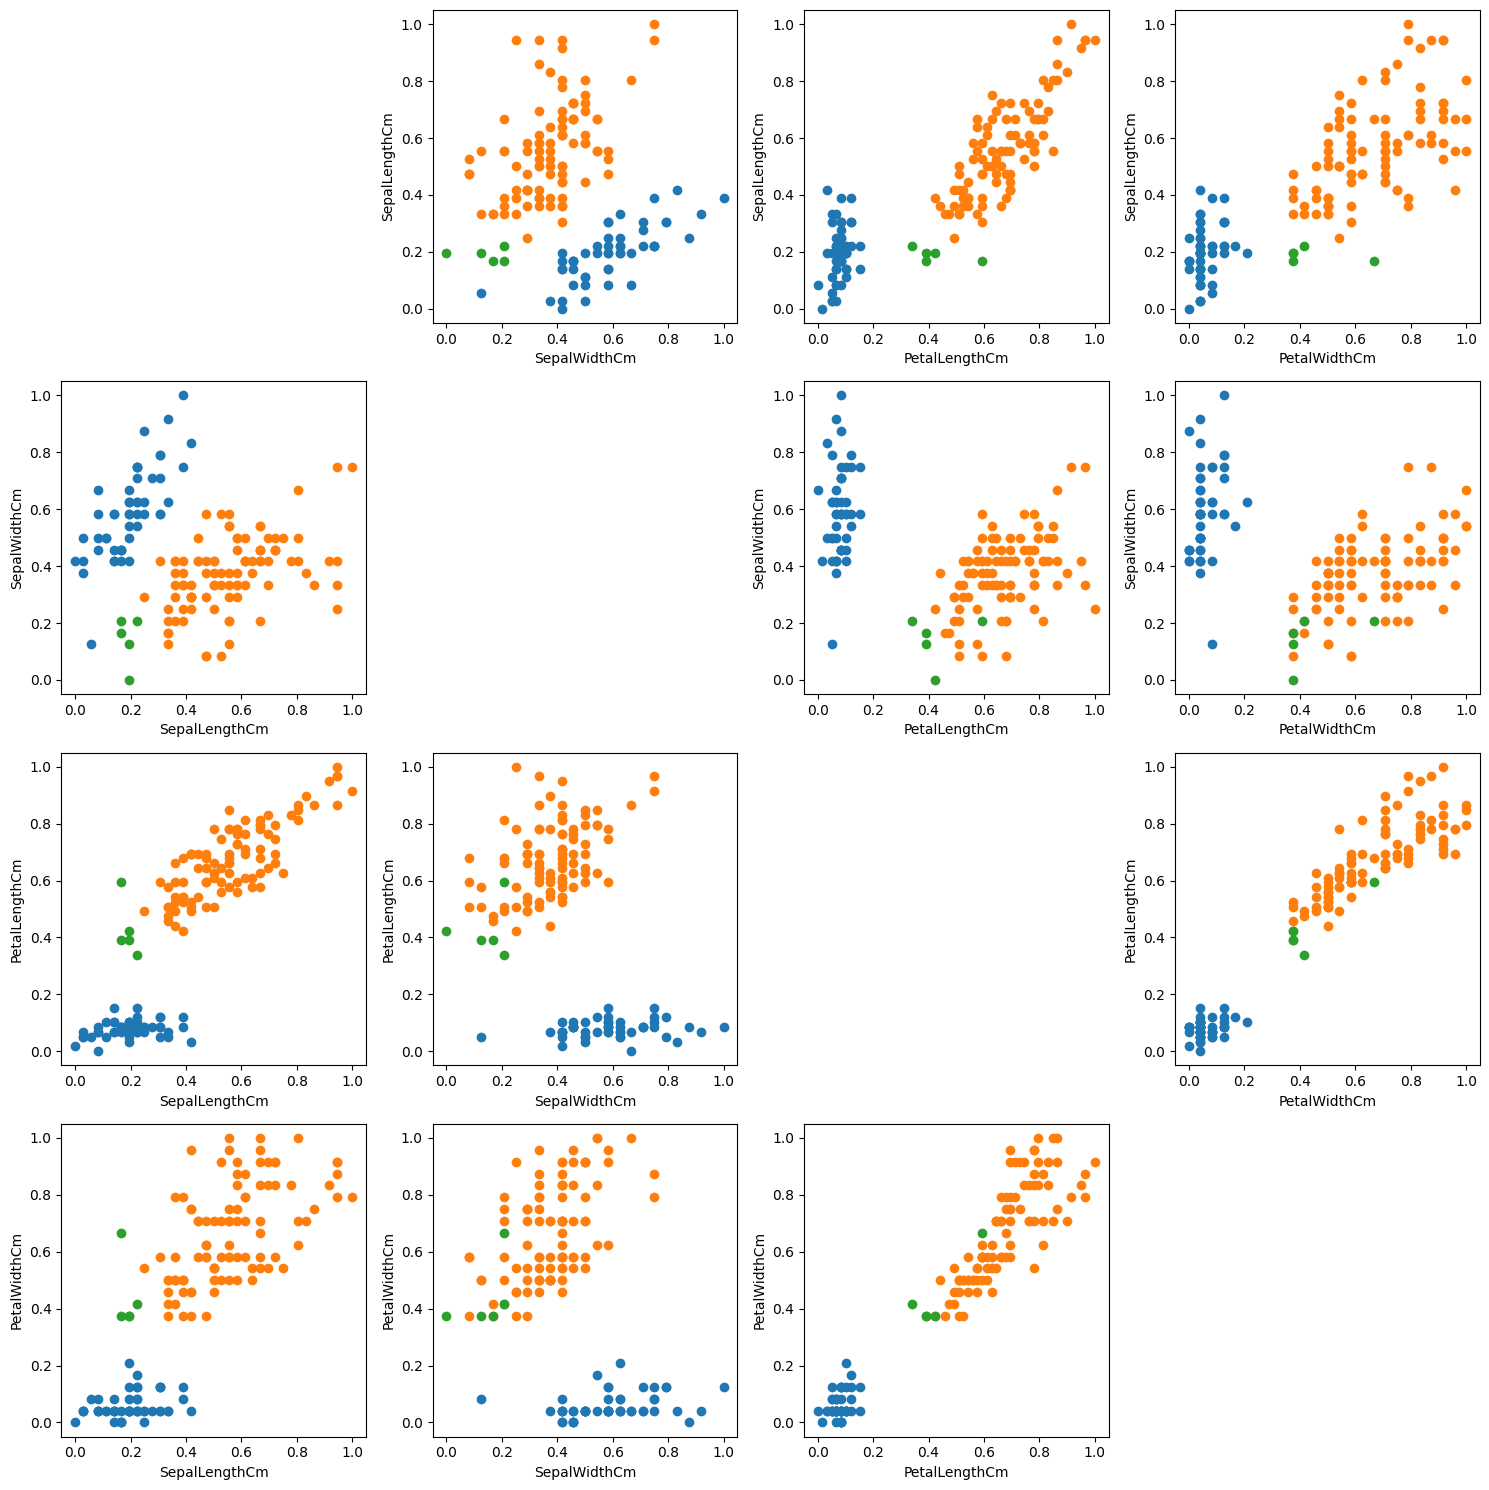

4


c:\Users\Loassar\Documents\University\semester_1\ML_algo\fall-24\fall-24\students\rt-akhmarov\lab_1\visualization.py:56: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}", c=colors[cluster])


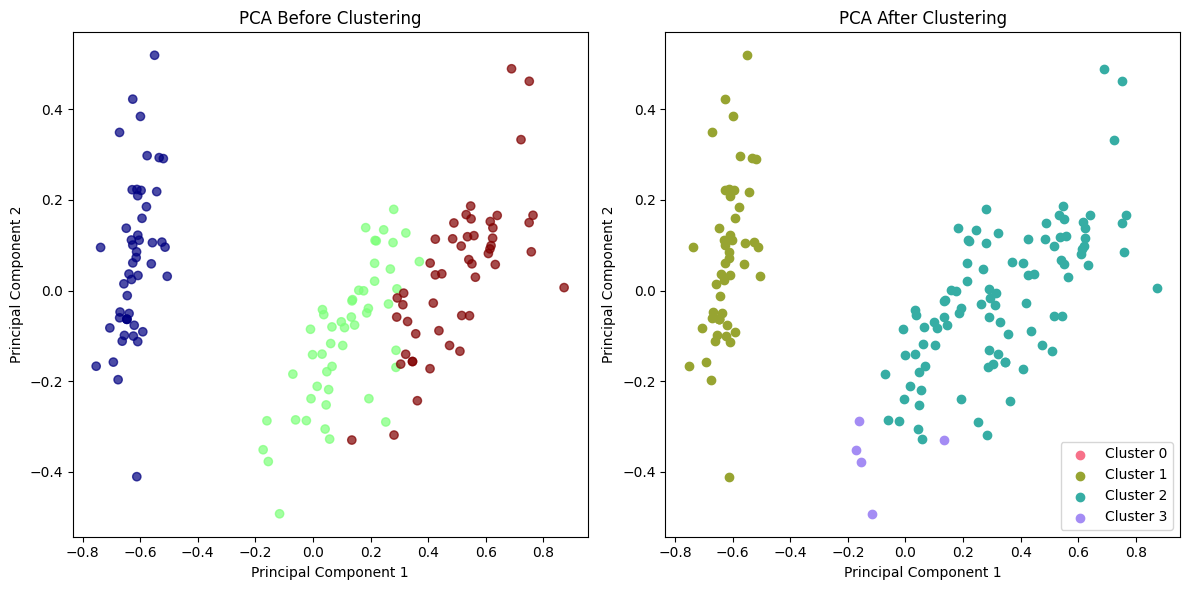

In [26]:
show_results(X_iris, y_iris, eps_cus=0.62, eps_ref=0.21, min_s=20)

Кастомная модель:
Среднее внутрикластерное расстояние: 0.17298218094436535
Среднее межкластерное расстояние: 0.38875138294024947
Кастомная модель, время выполнения: 0.1240 сек
------------------------------
Эталонная модель:
Среднее внутрикластерное расстояние: 0.2553624208201824
Среднее межкластерное расстояние: 0.37571653717609244
Эталонная модель, время выполнения: 0.2302 сек


c:\Users\Loassar\Documents\University\semester_1\ML_algo\fall-24\fall-24\students\rt-akhmarov\lab_1\dbscan_clustering.py:81: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


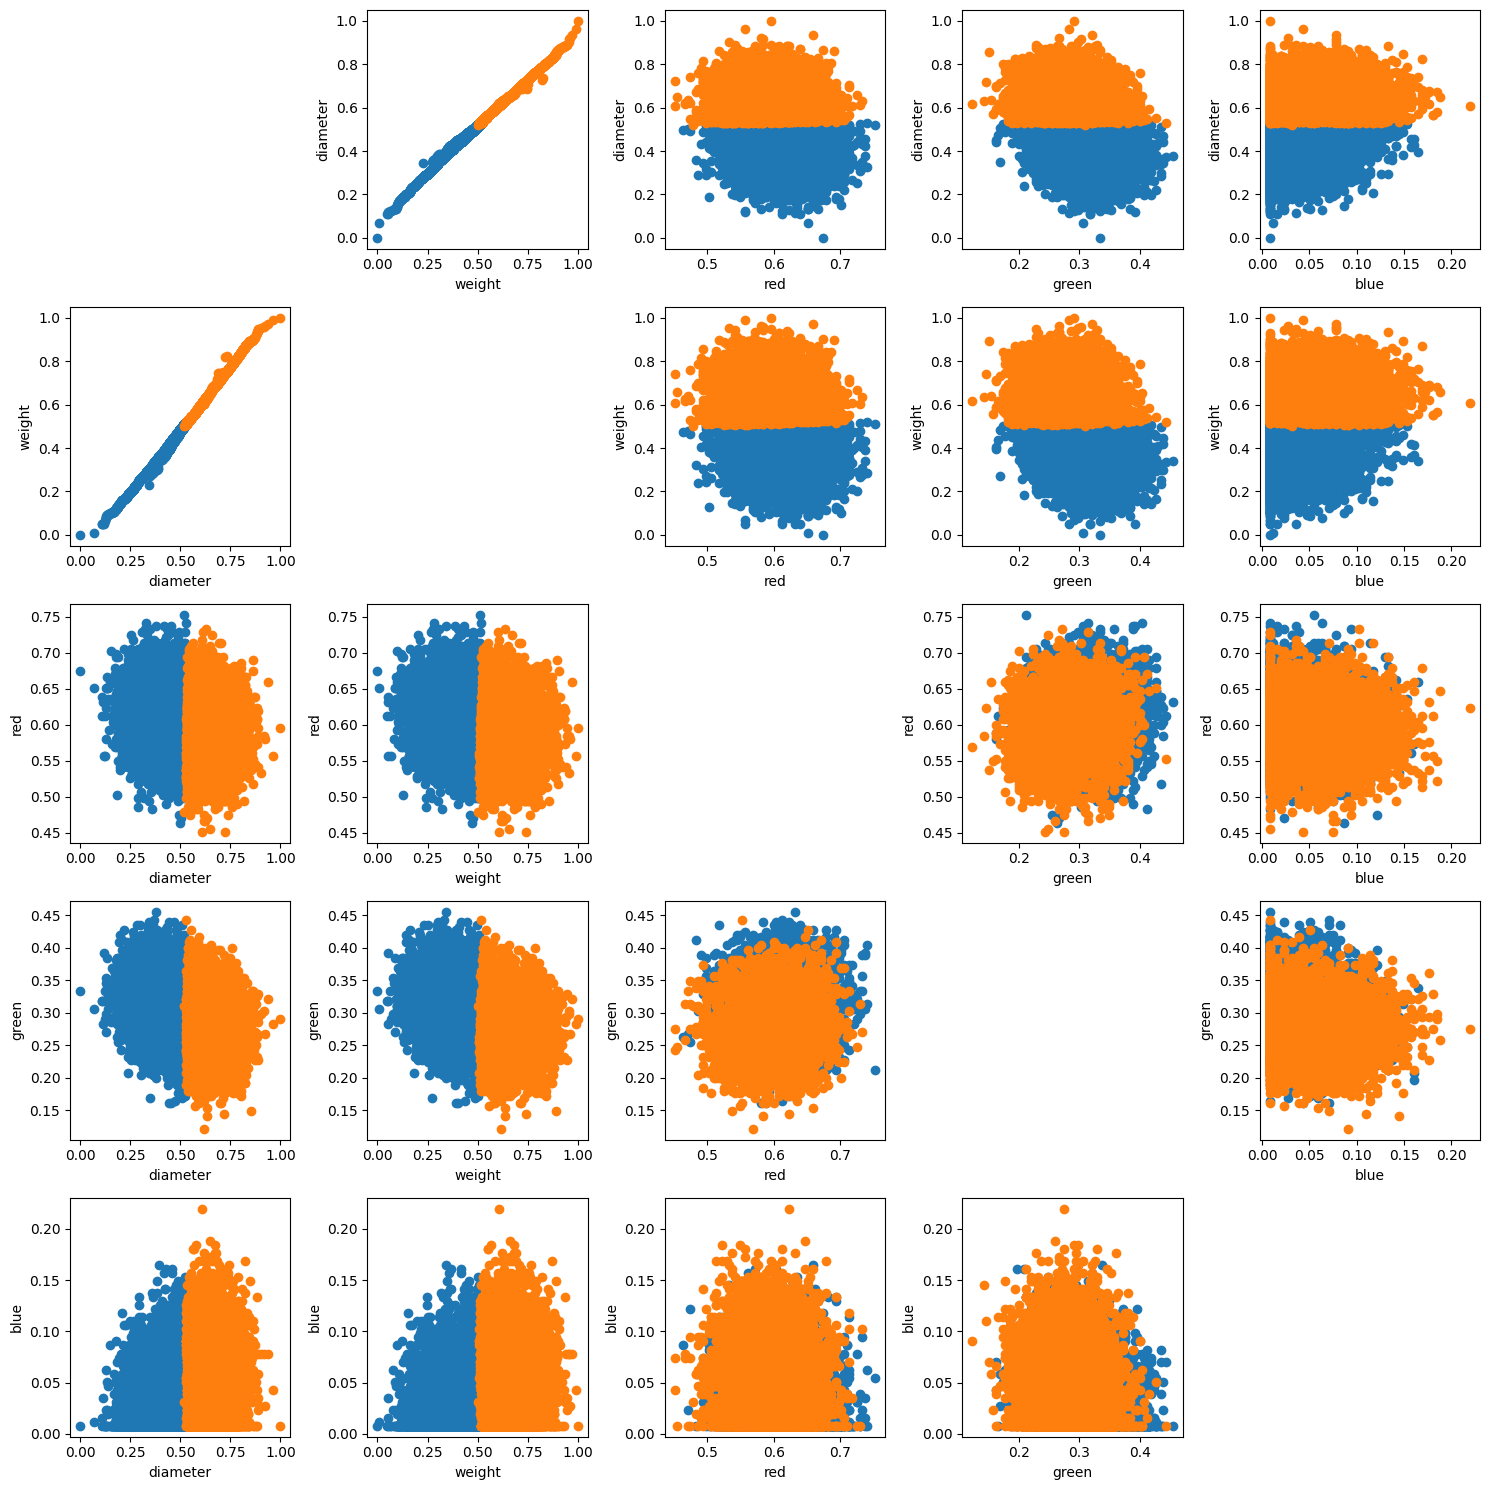

3


c:\Users\Loassar\Documents\University\semester_1\ML_algo\fall-24\fall-24\students\rt-akhmarov\lab_1\visualization.py:56: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}", c=colors[cluster])


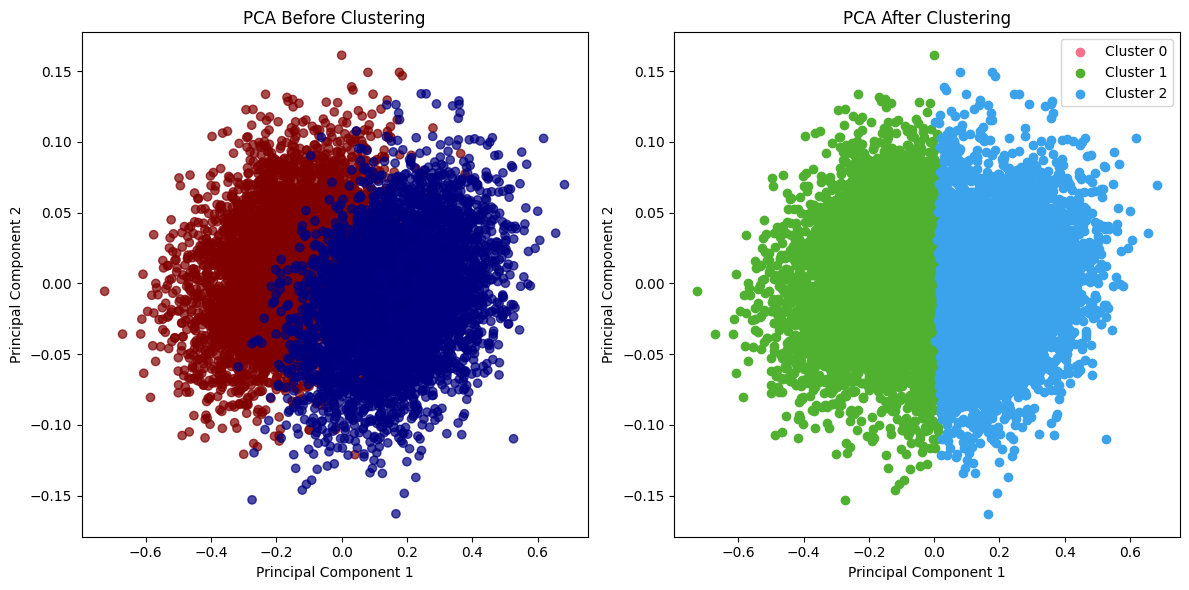

In [28]:
show_results(X_citrus, y_citrus.to_numpy(), eps_cus=0.75, eps_ref=0.05, min_s=100)